In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%load_ext autoreload
%autoreload 2

import main

In [2]:
labels = pd.Series(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])

train_path = '../blobs/notMNIST_large'
test_path = '../blobs/notMNIST_small'

def get_train_dir(label):
    return os.path.join(train_path, label)

def get_test_dir(index):
    return os.path.join(test_path, label)

[52325, 52290, 52231, 52246, 52300, 52272, 52295, 52145, 46651, 52236]


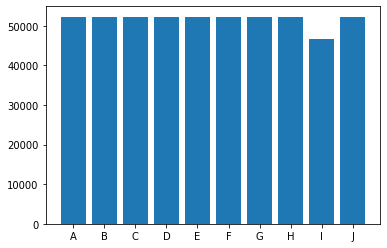

In [3]:
counts = [
    len(os.listdir(td))
    for td in (get_train_dir(label) for label in labels)
]
print(counts)
plt.bar(labels, counts)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []
for label, index in zip(labels, labels.index):
    train_dir = get_train_dir(label)
    files = pd.Series(os.path.join(train_dir, name) for name in os.listdir(train_dir))
    # reducing the number of samples for faster processing
    files = files.sample(len(files) // 10 * 6)
    train, val = train_test_split(files, test_size=0.05)
    x_train.extend(train)
    y_train.extend(index for _ in range(len(train)))
    x_val.extend(val)
    y_val.extend(index for _ in range(len(val)))
    
    test_dir = get_test_dir(label)
    test = [os.path.join(test_dir, name) for name in os.listdir(test_dir)]
    x_test.extend(test)
    y_test.extend(index for _ in range(len(test)))

Shuffle items to avoid training on consecutive labels

In [5]:
main.shuffle_in_unison(x_train, y_train)
main.shuffle_in_unison(x_val, y_val)
main.shuffle_in_unison(x_test, y_test)

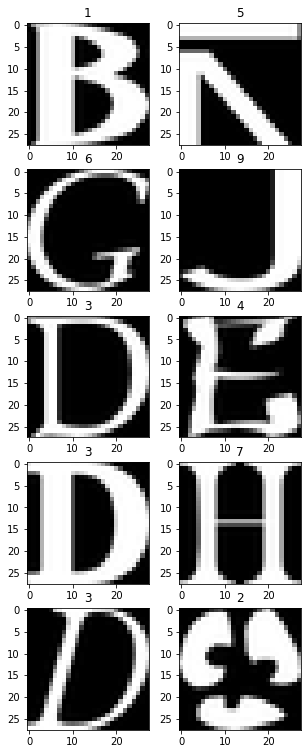

In [6]:
fig = plt.figure(figsize=(5, 13))
for i in range(10):
    img = main.load_image(x_train[i])
    ax = fig.add_subplot(5, 2, i + 1)
    ax.imshow(img, cmap='gray')
    ax.set_title(y_train[i])

plt.show()

Duplicates in training and test datasets have been removed. See `main.py` for details. See `removed.txt` for a list of removed files.

In [7]:
x_test_data = pd.DataFrame(main.load_image_vector(file) for file in x_test)
y_test_data = pd.Series(y_test)

In [8]:
size = 50010
x_train_data = pd.DataFrame(main.load_image_vector(file) for file in x_train[:size])
y_train_data = pd.Series(y_train[:size])

In [ ]:
from sklearn.linear_model import LogisticRegression

sizes = [50, 100, 1000, 50000]
scores = []
for size in sizes:
    # TODO: use val set to adjust C
    clf = LogisticRegression(C=1.0, max_iter=10000)
    sample_x = x_train_data.sample(size)
    sample_y = y_train_data.iloc[sample_x.index]
    clf.fit(sample_x, sample_y)
    score = clf.score(x_test_data, y_test_data)
    scores.append(score)

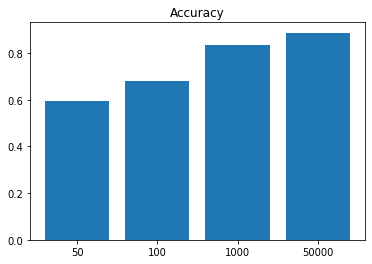

In [27]:
plt.bar(range(len(scores)), scores)
plt.xticks(range(len(scores)), [str(i) for i in sizes])
plt.title('Accuracy')
plt.show()